# Week 1 — NSL-KDD Dataset Exploration (EDA)
Goal: Load the dataset, inspect shapes, label mix, key categorical features, and basic numeric distributions. Save a few plots for the report. No modeling this week.


In [1]:
# !pip install pandas matplotlib numpy  # <- run once if needed

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ROOT = Path("..")  # notebook is in notebooks/
DATA = ROOT / "data"  # put KDDTrain+.txt, KDDTest+.txt here
FIGS = ROOT / "outputs" / "figures"
TABLES = ROOT / "outputs" / "tables"
FIGS.mkdir(parents=True, exist_ok=True)
TABLES.mkdir(parents=True, exist_ok=True)

# 41 features + label (from KDD'99/NSL-KDD docs)
COLUMNS = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",
]

# attack label -> coarse category
ATTACK_MAP = {
    "normal": "Normal",
    # DoS
    "neptune": "DoS",
    "smurf": "DoS",
    "back": "DoS",
    "teardrop": "DoS",
    "land": "DoS",
    "pod": "DoS",
    "mailbomb": "DoS",
    "apache2": "DoS",
    "udpstorm": "DoS",
    "processtable": "DoS",
    "worm": "DoS",
    # Probe
    "satan": "Probe",
    "ipsweep": "Probe",
    "nmap": "Probe",
    "portsweep": "Probe",
    "mscan": "Probe",
    "saint": "Probe",
    # R2L
    "guess_passwd": "R2L",
    "ftp_write": "R2L",
    "imap": "R2L",
    "phf": "R2L",
    "multihop": "R2L",
    "warezmaster": "R2L",
    "warezclient": "R2L",
    "spy": "R2L",
    "xlock": "R2L",
    "xsnoop": "R2L",
    "snmpguess": "R2L",
    "snmpgetattack": "R2L",
    "httptunnel": "R2L",
    "sendmail": "R2L",
    "named": "R2L",
    # U2R
    "buffer_overflow": "U2R",
    "loadmodule": "U2R",
    "rootkit": "U2R",
    "perl": "U2R",
    "sqlattack": "U2R",
    "xterm": "U2R",
    "ps": "U2R",
}


def load_nsl_split(filename: str) -> pd.DataFrame:
    """Load NSL-KDD split from ../data/, attach coarse attack_category & is_attack."""
    df = pd.read_csv(DATA / filename, names=COLUMNS)
    df["attack_category"] = df["label"].map(ATTACK_MAP).fillna("Other")
    df["is_attack"] = np.where(df["attack_category"].eq("Normal"), "Normal", "Attack")
    return df


In [2]:
df_train = load_nsl_split("KDDTrain+.txt")

print("TRAIN shape:", df_train.shape)
display(df_train.head())

print("\nLabel counts (top 15):")
display(df_train["label"].value_counts().head(15))


TRAIN shape: (125973, 44)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_category,is_attack
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Other,Attack
0,udp,other,SF,146,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Other,Attack
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Other,Attack
0,tcp,http,SF,232,8153,0,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Other,Attack
0,tcp,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Other,Attack



Label counts (top 15):


label
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
Name: count, dtype: int64

In [10]:
# Define categorical (non-numeric) columns
CATEGORICALS = {
    "protocol_type",
    "service",
    "flag",
    "label",
    "attack_category",
    "is_attack",
}

# Try converting every other column to numeric
for col in df_train.columns:
    if col not in CATEGORICALS:
        df_train[col] = pd.to_numeric(df_train[col], errors="coerce")

# Check dtypes now
print(df_train.dtypes.head(15))


duration             float64
protocol_type         object
service               object
flag                   int64
src_bytes              int64
dst_bytes              int64
land                   int64
wrong_fragment         int64
urgent                 int64
hot                    int64
num_failed_logins      int64
logged_in              int64
num_compromised        int64
root_shell             int64
su_attempted           int64
dtype: object


In [3]:
# compact summary
summary = pd.DataFrame(
    {
        "rows": [len(df_train)],
        "cols": [df_train.shape[1]],
        "unique_labels": [df_train["label"].nunique()],
        "unique_services": [df_train["service"].nunique()],
        "unique_protocols": [df_train["protocol_type"].nunique()],
        "unique_flags": [df_train["flag"].nunique()],
        "attack_ratio_%": [round(100 * df_train["is_attack"].eq("Attack").mean(), 2)],
    }
)
summary.to_csv(TABLES / "train_basic_summary.csv", index=False)
summary


,rows,cols,unique_labels,unique_services,unique_protocols,unique_flags,attack_ratio_%
0,125973,44,22,11,70,3341,100.0


In [4]:
print("Attack categories:\n")
display(df_train["attack_category"].value_counts())

print("\nTop services:\n")
display(df_train["service"].value_counts().head(15))

print("\nProtocols mix (%):\n")
display((df_train["protocol_type"].value_counts(normalize=True) * 100).round(2))

print("\nTop flags:\n")
display(df_train["flag"].value_counts().head(10))


Attack categories:



attack_category
Other    125973
Name: count, dtype: int64


Top services:



service
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


Protocols mix (%):



protocol_type
http         32.02
private      17.35
domain_u      7.18
smtp          5.81
ftp_data      5.45
             ...  
tftp_u        0.00
http_8001     0.00
aol           0.00
harvest       0.00
http_2784     0.00
Name: proportion, Length: 70, dtype: float64


Top flags:



flag
0       49392
8        3691
1        2432
44       2334
45       2089
1032     2001
46       1294
43       1284
105       998
147       948
Name: count, dtype: int64

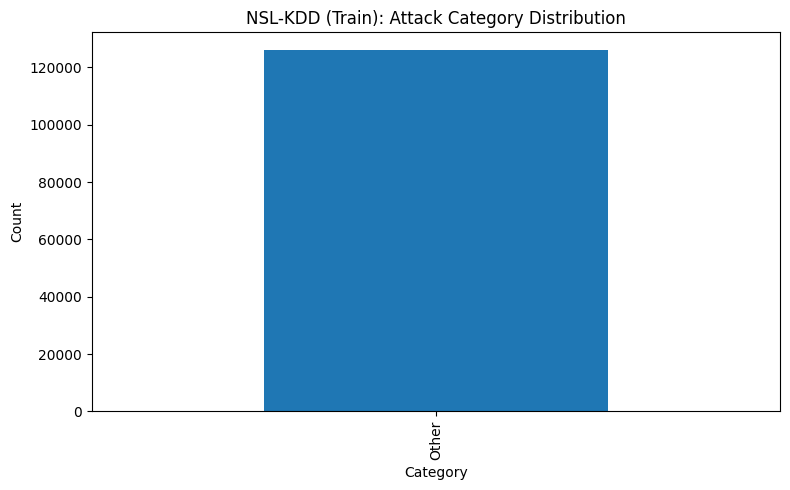

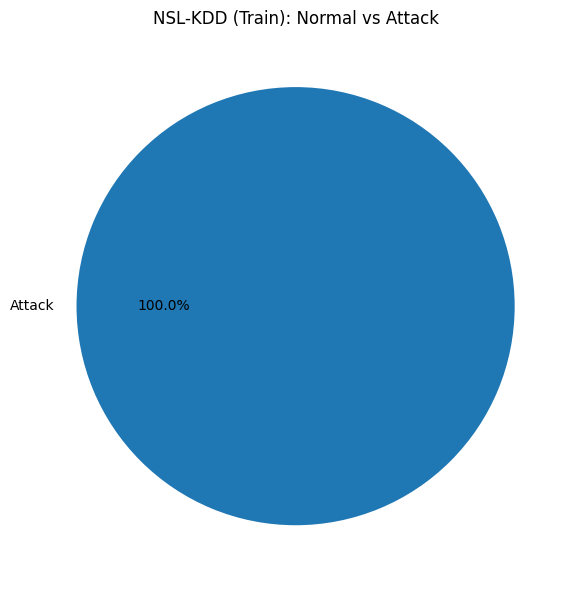

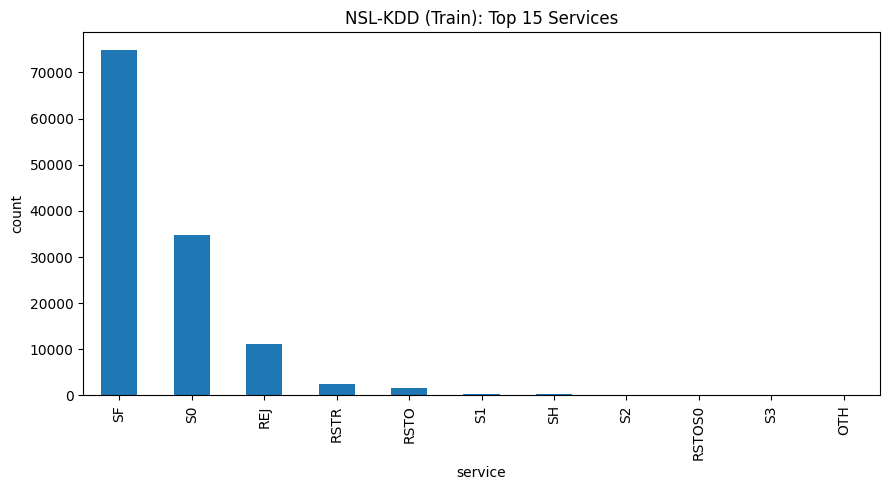

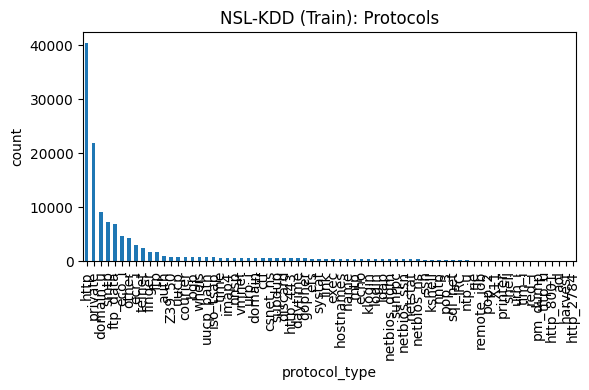

In [5]:
# A) Attack category distribution (bar)
ax = df_train["attack_category"].value_counts().plot(kind="bar", figsize=(8, 5))
ax.set_title("NSL-KDD (Train): Attack Category Distribution")
ax.set_xlabel("Category")
ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig(FIGS / "train_attack_category_bar.png", dpi=200)
plt.show()

# B) Normal vs Attack (pie)
df_train["is_attack"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("NSL-KDD (Train): Normal vs Attack")
plt.ylabel("")
plt.tight_layout()
plt.savefig(FIGS / "train_normal_vs_attack_pie.png", dpi=200)
plt.show()

# C) Top 15 services (bar)
df_train["service"].value_counts().head(15).plot(kind="bar", figsize=(9, 5))
plt.title("NSL-KDD (Train): Top 15 Services")
plt.xlabel("service")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(FIGS / "train_top_services_bar.png", dpi=200)
plt.show()

# D) Protocols (bar)
df_train["protocol_type"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("NSL-KDD (Train): Protocols")
plt.xlabel("protocol_type")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(FIGS / "train_protocols_bar.png", dpi=200)
plt.show()


In [6]:
num_cols = df_train.select_dtypes(include=[np.number]).columns
stats = df_train[num_cols].describe().T
stats.to_csv(TABLES / "train_numeric_stats.csv")
stats.head(10)


,count,mean,std,min,25%,50%,75%,max
flag,125973.0,45566.743000,5.870331e+06,0.0,0.0,44.0,276.0,1.379964e+09
src_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.0,516.0,1.309937e+09
dst_bytes,125973.0,0.000198,1.408607e-02,0.0,0.0,0.0,0.0,1.000000e+00
land,125973.0,0.022687,2.535300e-01,0.0,0.0,0.0,0.0,3.000000e+00
wrong_fragment,125973.0,0.000111,1.436603e-02,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.204409,2.149968e+00,0.0,0.0,0.0,0.0,7.700000e+01
hot,125973.0,0.001222,4.523914e-02,0.0,0.0,0.0,0.0,5.000000e+00
num_failed_logins,125973.0,0.395736,4.890101e-01,0.0,0.0,0.0,1.0,1.000000e+00
logged_in,125973.0,0.279250,2.394204e+01,0.0,0.0,0.0,0.0,7.479000e+03
num_compromised,125973.0,0.001342,3.660284e-02,0.0,0.0,0.0,0.0,1.000000e+00


C:\Users\harsh\AppData\Local\Temp\ipykernel_19288\536991045.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")  # heavy tails


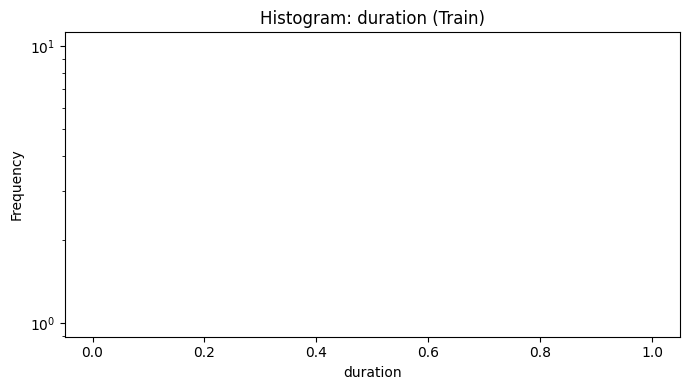

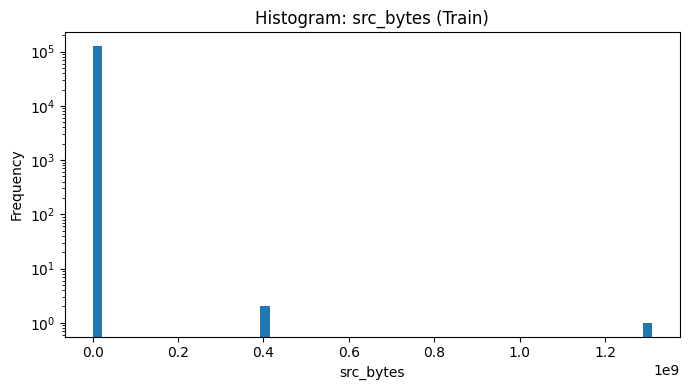

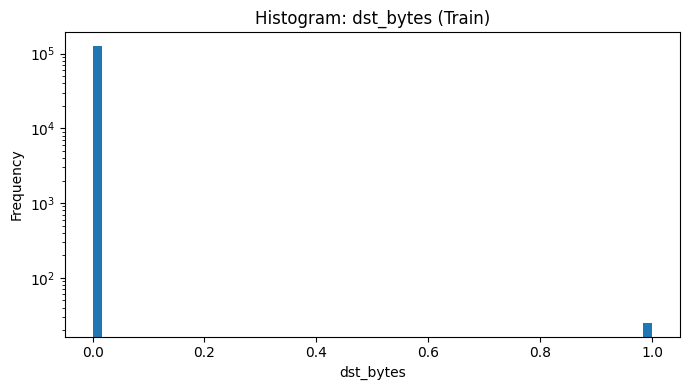

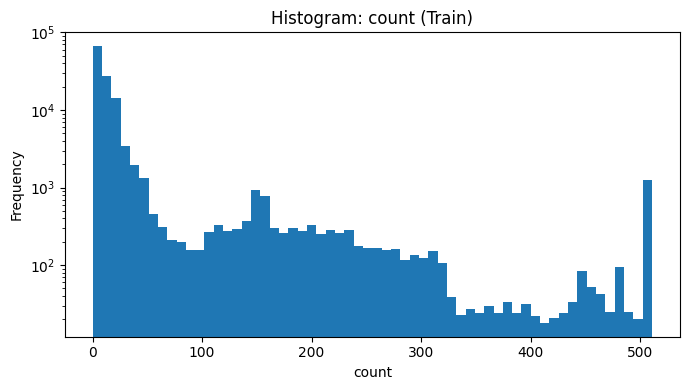

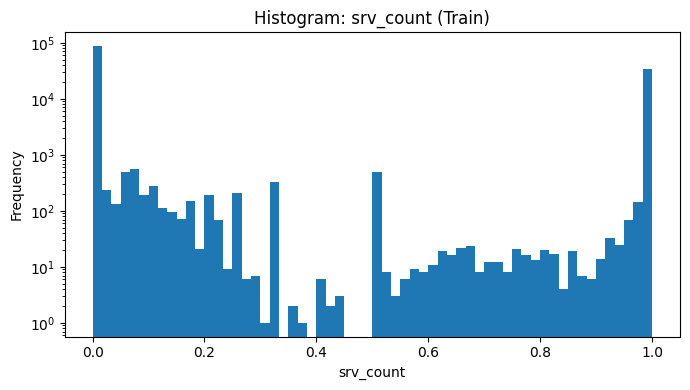

In [12]:
for col in ["duration", "src_bytes", "dst_bytes", "count", "srv_count"]:
    if pd.api.types.is_numeric_dtype(df_train[col]):  # check before plotting
        ax = df_train[col].dropna().plot(kind="hist", bins=60, figsize=(7, 4))
        ax.set_title(f"Histogram: {col} (Train)")
        ax.set_xlabel(col)
        ax.set_yscale("log")  # heavy tails
        plt.tight_layout()
        plt.savefig(FIGS / f"train_hist_{col}.png", dpi=200)
        plt.show()
    else:
        print(f"Skipping {col} (not numeric)")
